# DS105 Final Project - Vehicle Insurance Fraud Detection  

Vehicle insurance fraud is a real-life problem that most insurance companies face. It involves conspiring to make false or exaggerated claims involving property damage or personal injuries following an accident, staging accidents where fraudsters deliberately “arrange” for accidents to occur, using phantom passengers where people who were not even at the scene of the accident claim to have suffered grievous injury. They can also make false personal injury claims where personal injuries are grossly exaggerated.

Such fraud cases are intolerable as it can lead to significant losses for the company if the claim amount is large. It can also affect the victims (drivers) who are targeted in such fraud cases, as their future vehicle insurance premiums can be significantly higher and they will no longer be eligible for no-claim discount. 

Therefore, such fraud cases must be treated seriously and companies will need to do their best to minimise such cases. 


This dataset consists of vehicle and insurance-related details taken from Kaggle (https://www.kaggle.com/datasets/shivamb/vehicle-claim-fraud-detection) and is originally a real-life fraud machine learning case study used by Oracle. 
There are a total of 33 columns and 15420 rows. 
There are 8 continuous features and 24 categorical features. A label to indicate if it is a fraud case is also included – FraudFound_P (0,1)



## Problem Statement

In this project, we aim to help the insurance company to filter out potential fraud cases and minimise actual fraud cases.

**End Goal** : Create a machine learning model to predict if a specific vehicle insurance claim is a fraudulent one. 
               Supervised classification model – predict if case is fraudulent or not (Binary Classification)

**Sub-goals**: To uncover other patterns or trends for such fraud cases through exploratory data analysis

1. How do the features vary for fraud cases ?
2. How do the demographics (e.g. Age, Gender, Marital Status) vary with the features for fraud cases? 

    - There was a decreasing trend for fraud occurences from 1994 to 1996. Why was that happening? Were there a difference in the demographics along the years?
    
    - As most of the vehicles involved in fraud were priced from $20000−$29000 and mostly Sedan, what were the demographics for this group of fraudsters?
    
    - For the top 3 common car models in fraud cases, what were the demographics of this group of fraudsters? 



**The workflow of this project is as follows:**
1. Import relevant libraries and dataset
2. Initial data exploration
3. Initial data cleaning and wrangling
4. Exploratory data analysis 
5. Data-preprocessing and Feature engineering
7. Machine Learning ( covered in the Machine Learning notebook)

# 1. Import relevant libraries and dataset

In [1]:
# Import relevant libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import scipy.stats as spstats

from sklearn.preprocessing import OrdinalEncoder

In [2]:
# Import dataset
df = pd.read_csv('fraud_oracle.csv')

# 2. Initial Data Exploration

In [3]:
# Get a feel of the data by looking at the first 5 rows of the dataset
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [4]:
# Observing the statistical characteristics of the dataset 
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [6]:
#Check if there are any null values in the dataset
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [7]:
# Check for the number of rows and columns in the dataset
df.shape

(15420, 33)

There are no null values , so we will now check for duplicate entries, data types and data format, and whether certain data columns are relevant and repetitive.

# 3. Initial data cleaning and wrangling

### (a) Detecting and removing duplicates 

Duplicate rows, if exists, will be removed 


In [8]:
# To find out if there are duplicated records across all columns 
df[df.duplicated(keep='first')]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy


In [9]:
df.drop_duplicates ()
# Number of rows remain the same at 15420, no duplicates present and dropped

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


### (b) Check if columns are repetitive and if the data features are sound and of the right data type

Firstly, we will look at columns of datatype Object and Number separately. A count plot will be generated to look at the number of unique values each column has. This is to give us a sensing on how whetehr the column should be a categorical or continuous feature. If categorical, what kind of encoding methods or binning can be done? 

<AxesSubplot:title={'center':'Unique values per feature'}>

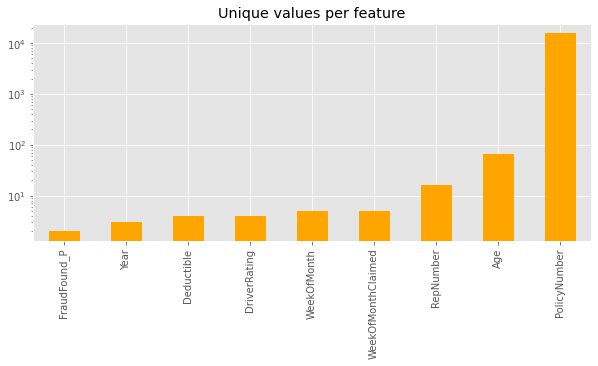

In [10]:
# Find out the number of unique values of the categorical features 
unique_values_cat = df.select_dtypes(
  include= "object").nunique().sort_values()

# Find out the number of unique values of the numerical features 
unique_values_con = df.select_dtypes(
  include= "number").nunique().sort_values()

# Plot a countplot of the unique values per numerical feature
unique_values_con.plot.bar(logy=True, figsize=(10, 4),
                       title="Unique values per feature", color= 'orange')

<AxesSubplot:title={'center':'Unique values per feature'}>

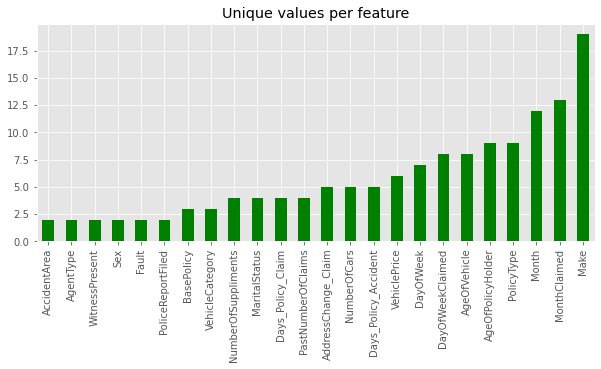

In [11]:
# Plot a countplot of the unique values per categorical feature
unique_values_cat.plot.bar( figsize=(10, 4),
                       title="Unique values per feature", color= 'green')

In [12]:
# Get the value counts of all the features for a more in-depth analysis
columns= df.columns
for col in columns:
    print(df[col].value_counts())

Jan    1411
May    1367
Mar    1360
Jun    1321
Oct    1305
Dec    1285
Apr    1280
Feb    1266
Jul    1257
Sep    1240
Nov    1201
Aug    1127
Name: Month, dtype: int64
3    3640
2    3558
4    3398
1    3187
5    1637
Name: WeekOfMonth, dtype: int64
Monday       2616
Friday       2445
Tuesday      2300
Thursday     2173
Wednesday    2159
Saturday     1982
Sunday       1745
Name: DayOfWeek, dtype: int64
Pontiac      3837
Toyota       3121
Honda        2801
Mazda        2354
Chevrolet    1681
Accura        472
Ford          450
VW            283
Dodge         109
Saab          108
Mercury        83
Saturn         58
Nisson         30
BMW            15
Jaguar          6
Porche          5
Mecedes         4
Ferrari         2
Lexus           1
Name: Make, dtype: int64
Urban    13822
Rural     1598
Name: AccidentArea, dtype: int64
Monday       3757
Tuesday      3375
Wednesday    2951
Thursday     2660
Friday       2497
Saturday      127
Sunday         52
0               1
Name: DayOfWeekCla

Below are the feature observations after analysing the value counts and unique values of each feature. This will allow us to have a better picture of the characteristics of the features and provide the basis of how we can do data-preprocessing and feature engineering later on. 


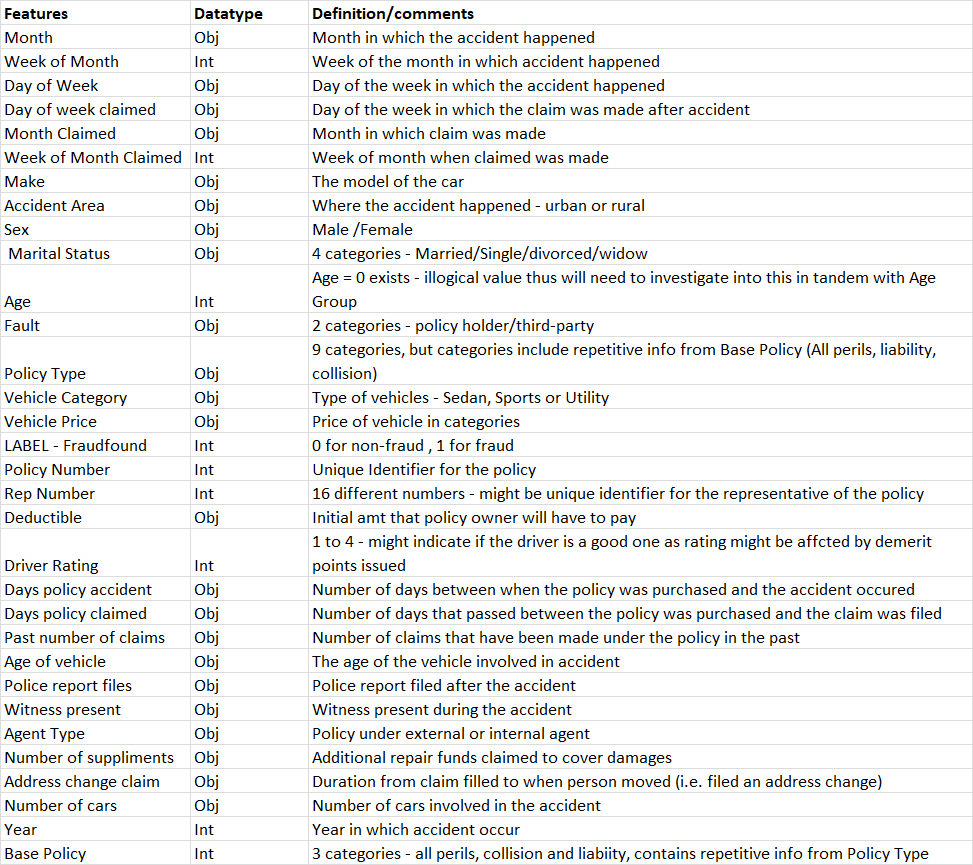

### (c) Investigate column Age for Age = 0 

In [13]:
# Dive in deeper into age to look at the unique categories , realised that there is age 0 - which is illogical 
df['Age'].unique()

array([21, 34, 47, 65, 27, 20, 36,  0, 30, 42, 71, 52, 28, 61, 38, 41, 32,
       40, 63, 31, 45, 60, 39, 55, 35, 44, 72, 29, 37, 59, 49, 50, 26, 48,
       64, 33, 74, 23, 25, 56, 16, 68, 18, 51, 22, 53, 46, 43, 57, 54, 69,
       67, 19, 78, 77, 75, 80, 58, 73, 24, 76, 62, 79, 70, 17, 66],
      dtype=int64)

In [14]:
# There a total of 320 rows with age = 0 
df[df['Age'] ==0]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
13,Jan,5,Friday,Honda,Rural,Wednesday,Feb,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
28,Jul,1,Saturday,Honda,Urban,Tuesday,Sep,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils
31,Mar,1,Sunday,Honda,Urban,Tuesday,Mar,2,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
58,May,1,Monday,Honda,Rural,Wednesday,May,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Liability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15243,May,2,Tuesday,Honda,Urban,Monday,May,3,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,Liability
15262,Mar,3,Monday,Honda,Urban,Thursday,Mar,3,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,Liability
15274,Apr,3,Monday,Honda,Urban,Tuesday,May,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,Collision
15379,Jan,2,Tuesday,Honda,Urban,Thursday,Jan,2,Male,Single,...,new,16 to 17,No,No,External,none,1 year,1 vehicle,1996,All Perils


There are a total of 320 rows with Age = 0. Let us find out the AgeOfPolicyHolder for those entries with Age = 0. Do these two features correspond with each other ?  

In [15]:
# Find out what is the AgeOfPolicyHolder for those with Age = 0
df.loc[df ['Age']== 0, 'AgeOfPolicyHolder'].unique()

array(['16 to 17'], dtype=object)

All rows with Age = 0 has AgeofPolicyHolder = '16 to 17'. Therefore, we can choose to replace the 0 values in Age with the mean of the range '16 to 17'. 

However, we also want to make sure that the 'Age' corresponds to the 'AgeofPolicyHolder'. If they do, we can drop one of the columns as they represent the same data. If they do not correspond to each other, the two columns might refer to the age for different groups of ppl. 

In [16]:
# Create a For loop to split the strings in AgeOfPolicyHolder and retrive only the integer value of the age

# Create a new list to collect the integers
newgroup = []
for age in df['AgeOfPolicyHolder']:
    if 'to' in age:
        temp = age.split()
        new = [int(temp[0]), int(temp[2])]
        newgroup.append(new)
    
    else:
        temp = age.split()
        new = [int(temp[1]), 100]
        newgroup.append(new)

In [17]:
# Create a For loop to check if the age in 'Age' column lies within the range of age from AgeOfPolicyHolder

#Create a new list to collect the results - if the age falls between the age range
results = []
for r in range(len(df['Age'])):
    if (df.loc[r,'Age']<= newgroup[r][0]) | (df.loc[r,'Age']>= newgroup[r][1]):
        results.append(1)  # append 1 to the list if the age falls outside of the age range
    else:
        results.append(0)  # append 0 to the list of the age falls within the age range 

In [18]:
# Convert the list results into a pandas dataframe and get the value counts for 0 and 1 
agegroup = pd.DataFrame(results, columns = ['Age within Age group']).value_counts()
print('% of records not in age groups', round((agegroup[1]/len(df))*100, 2))

% of records not in age groups 62.09


More than half of the ages (62%) are not within the age group of AgeofPolicyHolder. This is unlikely to be a typo error. It is highly possible that that the columns 'Age' and 'AgeofPolicyHolder' indicates the age of different groups of people. The 'Age' column might refer to the age of the person who filed a claim while the 'AgeofPolicyHolder' refers to the age for the policy holder. 

In this case, we will not drop any of the columns and will proceed to replace the age with mean of 'Age' column instead of the mean of age range 16-17.

In [19]:
# Find the average of the Age column 
avr = round(df['Age'].mean(), 0)

In [20]:
# Replace all 0 values woth the average age
df.loc[df['Age']==0, 'Age'] = avr

### (d) Clean up columns - DayOfWeekClaimed and MonthClaimed

These 2 columns consist of a 0 value. 

In [21]:
df.loc[df['MonthClaimed']== '0']

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils


In [22]:
df.loc[df['DayOfWeekClaimed']== '0']

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils


Row 1516 has 0 values for both 'MonthClaimed' and 'DayOfWeekClaimed'.Therefore, we proceed to drop this row from the dataset. Before we drop the row, let us check if this row is a fraud case or not. 

In [23]:
df.loc[1516, 'FraudFound_P']

0

Row 1516 is not a fraud case , which may be less valuable to us as it falls under the majority of the labels. Hence, we will drop row 1516. 

In [24]:
# Drop the column 1516 
df.drop(1516, axis = 0, inplace = True)

# Reset index of the dataset after dropping row
df.reset_index(drop= True, inplace = True)

### (e) Remove unncessary column - PolicyNumber

- Check if the policy number is duplicated 
- If there is no duplication in policy number, it is just a unique identifier and data contains no multiple claims from a single policy, thus this column can be deleted.

In [25]:
# Check for duplication in policy number
df[df.duplicated(['PolicyNumber'])]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy


In [26]:
# No duplicates - unique identifier , which is not nessasery for analyis --> drop the column
df.drop('PolicyNumber', axis = 1, inplace = True)

In [27]:
#Check if there are still duplicate records after policy number is removed - if none, it means that every entry is a unique claim
df[df.duplicated()]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy


# 4. Exploratory Data Analysis 

In [28]:
# Check for columns in dataset
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'RepNumber', 'Deductible',
       'DriverRating', 'Days_Policy_Accident', 'Days_Policy_Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [29]:
# Group the categorical features and continuous features separately
categorical = []
continuous = []
for col in df.columns:
    if len(df[col].unique()) < 20:   # if the unque values of a feature is more than 20, group it as a categorical feature 
        categorical.append(col)
    else:
        continuous.append(col)

print(categorical)
print(continuous)

['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'FraudFound_P', 'RepNumber', 'Deductible', 'DriverRating', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy']
['Age']


Only 'Age' column is a continous feature , while the others are categorical. 

<AxesSubplot:>

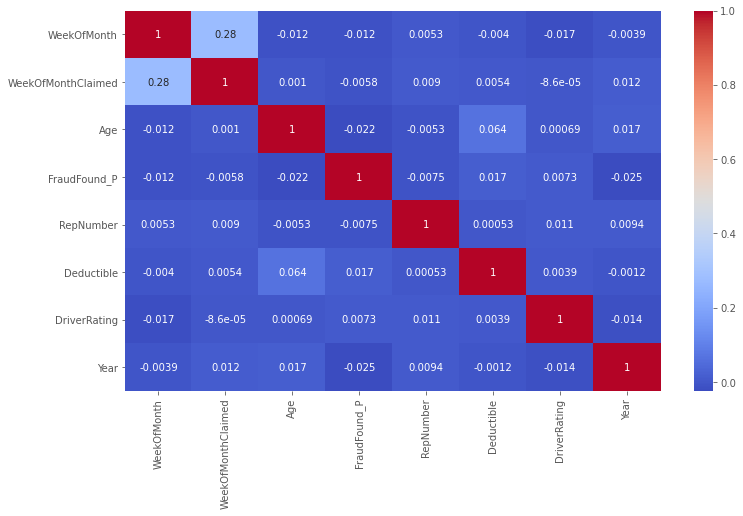

In [30]:
# Presenting the correlation as a hetmap for better visualisation
fig, ax = plt.subplots(figsize= (12,7))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True, ax = ax)

There is no strong correlation within the features , thus there is no multicollinearity. This is also due to the fact that there is only 1 continuous feature - Age. 

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15419 entries, 0 to 15418
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15419 non-null  object
 1   WeekOfMonth           15419 non-null  int64 
 2   DayOfWeek             15419 non-null  object
 3   Make                  15419 non-null  object
 4   AccidentArea          15419 non-null  object
 5   DayOfWeekClaimed      15419 non-null  object
 6   MonthClaimed          15419 non-null  object
 7   WeekOfMonthClaimed    15419 non-null  int64 
 8   Sex                   15419 non-null  object
 9   MaritalStatus         15419 non-null  object
 10  Age                   15419 non-null  int64 
 11  Fault                 15419 non-null  object
 12  PolicyType            15419 non-null  object
 13  VehicleCategory       15419 non-null  object
 14  VehiclePrice          15419 non-null  object
 15  FraudFound_P          15419 non-null

## In this section, we will address the first sub-goal:
**1. How do the features vary for fraud cases ?**

### (a) Continuous Features 

The only continuous feature in this dataset is Age. Thus, we will look at the distribution of Age and how it influences the fraud cases.

C:\Users\yeosi\anaconda3\envs\baseclone\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Histogram of Age'), Text(0.5, 0, 'Age')]

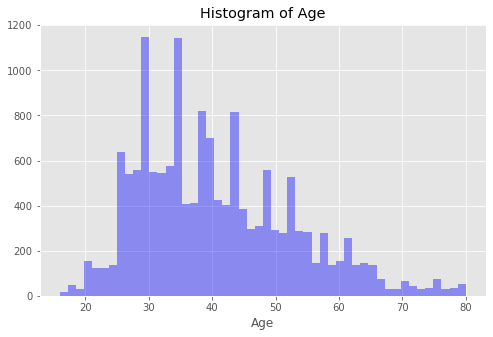

In [32]:
# Create a histogram of the Age column to look at the distribution
fig, ax = plt.subplots(figsize = (8, 5))
sns.distplot(df['Age'], kde= False, bins = 50, ax = ax , color = 'Blue')
ax.set(title = 'Histogram of Age', xlabel = 'Age')

The column Age is slightly right-skewed , thus there is a need to do a log transformation on the column Age to get a normal distribution later on. 

[Text(0.5, 1.0, 'Boxplot of Age'), Text(0.5, 0, 'Age')]

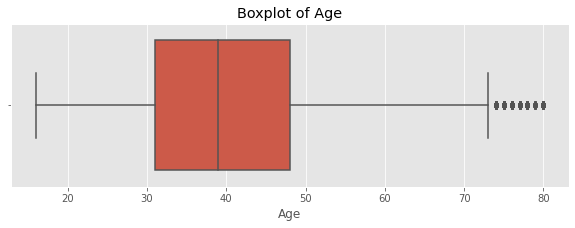

In [33]:
# Create a box plot to check if there are any outliers 
fig, ax = plt.subplots(figsize = (10,3))
sns.boxplot( x = 'Age', data = df, ax = ax)
ax.set(title = 'Boxplot of Age', xlabel = 'Age')

There are only a few outliers , and might not be significant enough to affect the dataset as a whole. Hence, we will go ahead to do a log transformation on the Age column later on to take care of the distribution instead of removing the outliers form the dataset. 

As fraud cases only make up around 6% of the whole dataset, we will just zoom into the fraud cases for a more meaningful and efficient exploratory data analysis. Now we will create a sub-dataset called fraud to sieve out those fraud cases. This dataset will be used to explore the relationships between fraud cases and the various features. 

In [34]:
# Finding out the percentage of fraud cases in the dataset 
(df['FraudFound_P'].value_counts(normalize = True))*100

0    94.013879
1     5.986121
Name: FraudFound_P, dtype: float64

In [35]:
# Allocating fraud cases as sub-dataset called fraud
fraud = df.loc[df['FraudFound_P'] == 1]

C:\Users\yeosi\anaconda3\envs\baseclone\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


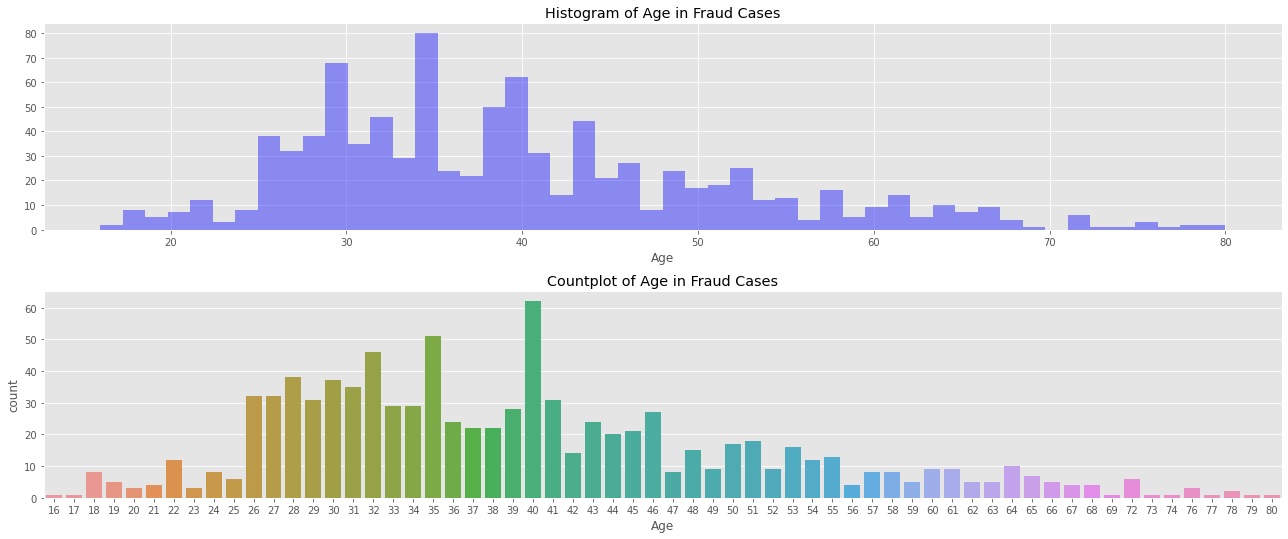

In [109]:
# Create histogram of Age in fraud dataset
fig, (ax0, ax1) = plt.subplots(nrows = 2, ncols= 1, figsize = (18,8))
sns.distplot(fraud['Age'], kde= False, bins = 50, ax = ax0 , color = 'Blue')
# Create a countplot of Age in fraud cases 
sns.countplot(x= 'Age', data = fraud, ax = ax1)
ax0.set(title = 'Histogram of Age in Fraud Cases', xlabel = 'Age')
ax1.set(title = 'Countplot of Age in Fraud Cases', xlabel = 'Age')
plt.tight_layout(rect=[0, 0.03, 1, 0.98])

**Conclusion**

The distribution of Age in Fraud dataset is also slightly right-skewed. In addition, most of the ages fall between 26 to 46 years old for fraud cases. 

### (b) Categorical features 

In [37]:
# Retrieve the list of categorical features
categorical

['Month',
 'WeekOfMonth',
 'DayOfWeek',
 'Make',
 'AccidentArea',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'WeekOfMonthClaimed',
 'Sex',
 'MaritalStatus',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'FraudFound_P',
 'RepNumber',
 'Deductible',
 'DriverRating',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'NumberOfCars',
 'Year',
 'BasePolicy']

As some of the columns are binary ( only 2 unique categories ) and some are multi-class ( more than 2 unique categories), we will proceed to separate the columns into 2 groups - Binary and multi-class , for better data visualisation and analysis. 


In [38]:
# Create a For loop through the Categorical list to separate the features into 2 groups - Binary and Multi-class
binary =[]
multi = []
for col in categorical:
    if len(df[col].unique()) < 3:   # Features with less than 2 unique values will be grouped as Binary 
        binary.append(col)          # Features with more 2 unique values will be grouped as Multi-class
    else:
        multi.append(col)              

print('Binary features:\n', binary,'\n')
print('Multi-cat features:\n', multi)

Binary features:
 ['AccidentArea', 'Sex', 'Fault', 'FraudFound_P', 'PoliceReportFiled', 'WitnessPresent', 'AgentType'] 

Multi-cat features:
 ['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'MaritalStatus', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'RepNumber', 'Deductible', 'DriverRating', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy']


As there are features which depict time e.g month, week, these features will be further grouped as time features. 

In [39]:
time_fea = ['Month', 'WeekOfMonth',
 'DayOfWeek','DayOfWeekClaimed',
 'MonthClaimed',
 'WeekOfMonthClaimed']
time_fea

['Month',
 'WeekOfMonth',
 'DayOfWeek',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'WeekOfMonthClaimed']

In [40]:
# The rest of the features will be grouped as Rest
rest = []
for i in multi:
    if i not in time_fea:
        rest.append(i)
        
rest

['Make',
 'MaritalStatus',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'RepNumber',
 'Deductible',
 'DriverRating',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'NumberOfCars',
 'Year',
 'BasePolicy']

 **There are now 3 different groups of features for analysis - binary, time_fea, rest.**



### Time Features

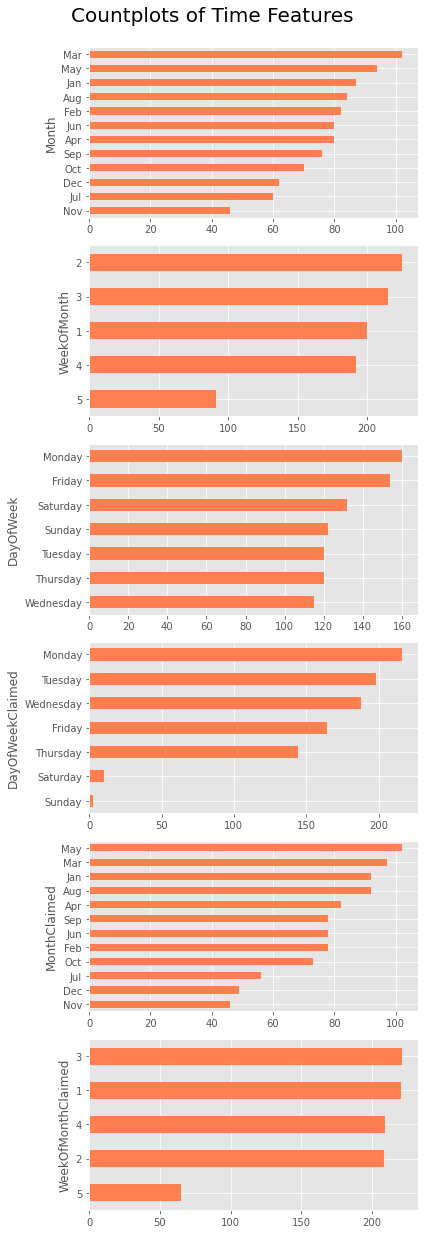

In [41]:
# Create a For loop to visualise barplots for all time features
n=len(time_fea)
fig,ax = plt.subplots(n ,1, figsize=(6,n*3))

for i in range(n):
    plt.sca(ax[i])  #Set the current Axes to ax and the current Figure to the parent of ax
    col = time_fea[i]
    fraud.groupby(col)[col].count().sort_values().plot(kind= 'barh', color= '#FF7F50')
    fig.suptitle ('Countplots of Time Features', fontsize = 20)
    
    fig.tight_layout(rect=[0, 0.03, 1, 0.98])


### Binary Features

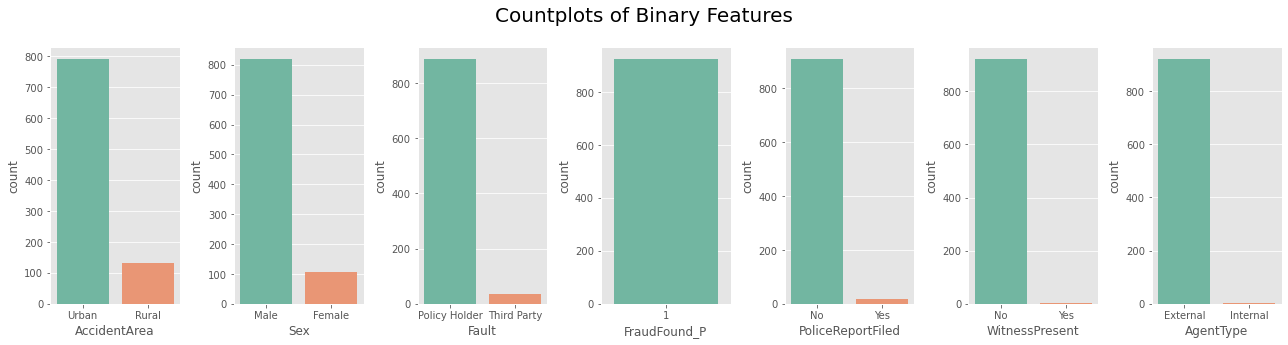

In [42]:
# Create a For loop to visualise countplots for all binary features
n=len(binary)
fig,ax = plt.subplots(1 ,n, figsize=(18, 5))

for i in range(n):
    plt.sca(ax[i])  #Set the current Axes to ax and the current Figure to the parent of ax
    col = binary[i]
    sns.countplot(x=col, data=fraud, palette = 'Set2')
    
    fig.suptitle ('Countplots of Binary Features', fontsize = 20)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.98])

### Multi-Class Features 

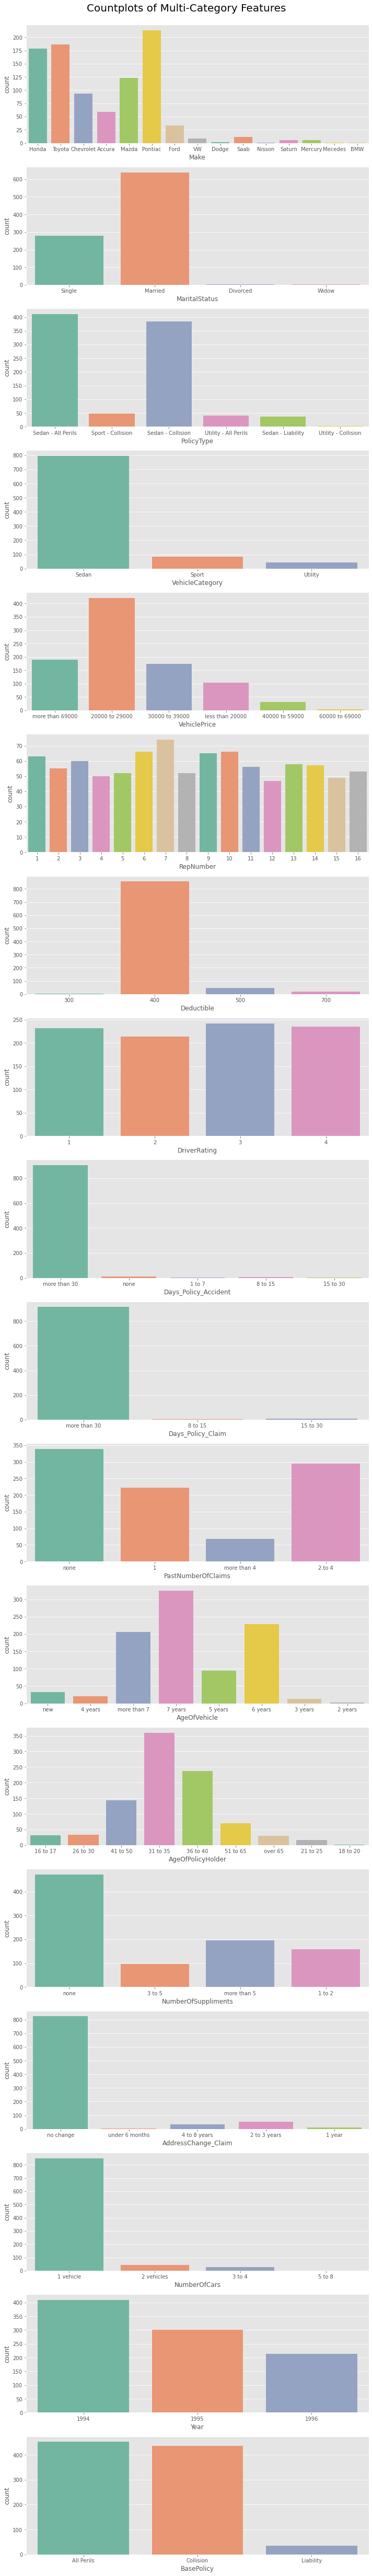

In [43]:
# Create a For loop to visualise countplots for all binary features
n=len(rest)
fig,ax = plt.subplots(n ,1, figsize=(10,n*4))

for i in range(n):
    plt.sca(ax[i])  #Set the current Axes to ax and the current Figure to the parent of ax
    col = rest[i]
    sns.countplot(x=col, data=fraud, palette = 'Set2')
    
    fig.suptitle ('Countplots of Multi-Category Features', fontsize = 20)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.98])

**Conclusion**

**Time Features**

- January, March and May generally had more fraud cases compared to the other months.
- Week 2 and week 3 of the months also had higher proportion of fraud cases. Week 5 has the least fraud cases as not all months have a fifth week. 
- More fraud cases seem to happen on Mondays and Fridays. 
- Fraud claims are also mostly made in the months of January, March and May , on week 1 and week 3. 
- It is observed that fraud claims are usually made on a weekday instead of weekend. This could be due to the opening hours of the company's office, which may not include weekends. 


**Binary Features**

- It is observed that fraud cases: 
 
     - occurred mostly in the urban areas
     - gender of policymaker predominantly male
     - policy holder are predominantly at fault 
     - police report are usually not made
     - Witness usually not present 
     - Policy usually under external agents

**Multi-Category Features**

- It is observed that fraud cases: 

     - Common car models : Pontiac, Honda, Toyota 
     - Policy Holder are usually Married or Single
     - Policy Type usually falls under - Sedan - All Perils, Sedan - Collision 
     - Vehicle type usually falls under Sedan with vehicle price from 20000-29000
     - Rep number does not seem to tilt towards a certain number, but fraud cases under rep number 7 is the highest
     - Policy deductible is usually at $400 
     - Driver's rating does not seem to have a trend in the fraud cases
     - Number of days between policy purchased and fraudulent accident occurence and its claim is usually more than 30 days 
     - Majority of the fraudulent claims had at least 1 past claims
     - Vehicle age usually more than 6 years 
     - Age of policyholder usually from 31-50
     - Number of suppliments mostly zero 
     - No address change 
     - 1 vehicle covered under policy 
     - Decreasing trend seen from 1994 to 1996 ; there must be some government/company policies or effort/stringent checks put in place to reduce fraud cases. One example could be increasing penalty for fraudsters when charged.  

From the countplots of the categorical features, we can observed that some features have multiple categories but a single category comprises more than 90% of the feature. For such features, we will reduce the number of categories by grouping the miorities into a single group, making them a binomial feature. This will help to reduce the dimensions of this dataset and prevent the curse of dimensionality and sparse dataset when we carry out encoding in the later part of the project. 

The features affected:
1. Make
2. MaritalStatus
3. Days_Policy_Accident
4. Days_Policy_Claim
5. AddressChange_Claim
6. NoOfCars

## (c) Multivariate Data Exploration

**Addressing the sub-goals :**

2. How do the demographics (e.g Age,Sex, Marital Status) vary with the features for fraud cases? Through this, we can know more about the characteristics of the group of ppl who commit such fraud crimes and be able to identify the right target audience in policy-making etc.

    -  There is a decreasing trend of fraud from 1994 to 1996 - this can be an interesting perspective to explore. Why was that so? Were there a difference in the demographics along the years? 

    - As most of the vehicles involved in fraud were priced from $20000 - $29000 and mostly Sedan, what was the predominant age groups for this group of policyholders?

    - For the common car models in fraud cases, what was the demographics like? (e.g Age group, Marital Status)

#### 1. Exploring the demographics for decreasing fraud trend from 1994 to 1996. 

[Text(0.5, 1.0, 'Boxplots of Ages across Marital Status')]

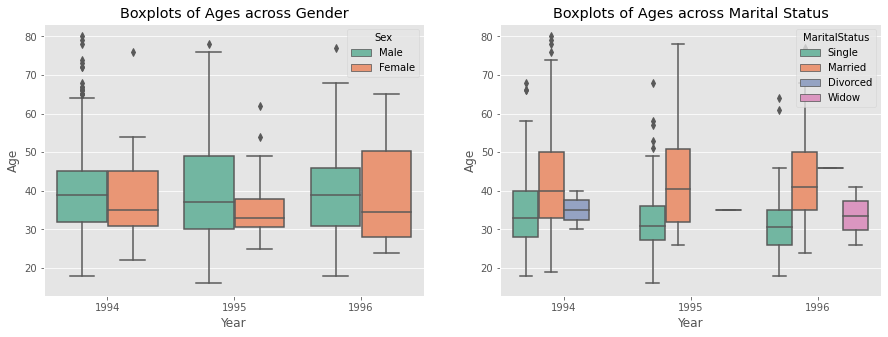

In [44]:
#Create boxplots to visualise gender and marital status acorss ages
fig,(ax0, ax1) = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot (y = 'Age', x = 'Year', data= fraud, palette = 'Set2', hue= 'Sex', ax= ax0)
sns.boxplot (y = 'Age', x = 'Year', data= fraud, palette = 'Set2', hue= 'MaritalStatus', ax= ax1)
ax0.set(title = 'Boxplots of Ages across Gender')
ax1.set(title = 'Boxplots of Ages across Marital Status')

The average ages of those involved in fraud cases did not really change significantly over the years. 
However, average age for singles decreased over the years. 
Married ones have a higher average age compared to singles and female were also generally younger than males.

[Text(0.5, 1.0, 'Countplot of Fraud Cases across Policy Holder Ages from 1994-1996')]

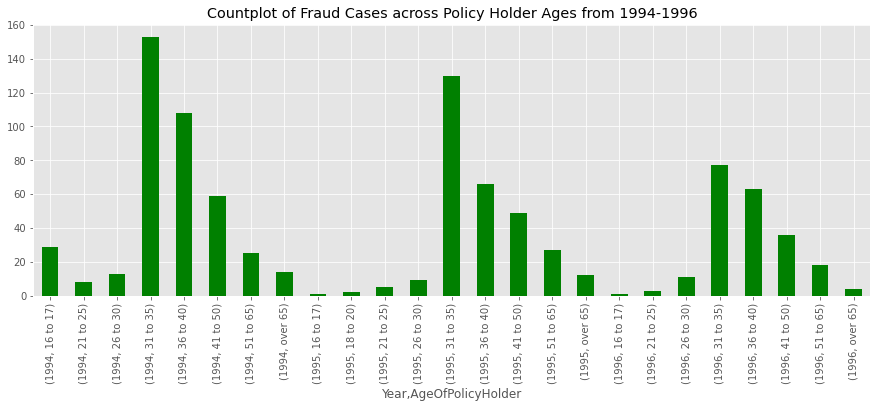

In [45]:
# Create a countplot to visualise the fraud cases across age groups of policy holder over the years
fig,(ax) = plt.subplots(figsize=(15, 5))
fraud.groupby(['Year','AgeOfPolicyHolder'])['Year'].count().plot(kind= 'bar', ax = ax, color = 'g')
ax.set(title = 'Countplot of Fraud Cases across Policy Holder Ages from 1994-1996')
# How to change the colours of the bars accoridng to the years?

The fraud cases across the age groups of policy holders all decrease over the years. The decreasing pattern is the same across all years. 

Since this is a general trend for the fraud cases, we will check if the the same decreasing trend applies to the other features. Our main goal here is to see if there are any features with a different trend over the years, which might provide insights to why fraud cases decreased . 

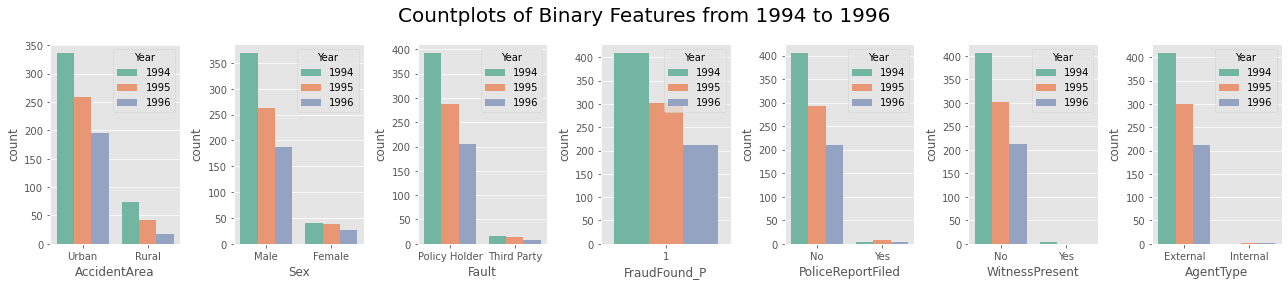

In [46]:
# Create countplots to show the trend of binary features across the years 
n=len(binary)
fig,ax = plt.subplots(1 ,n, figsize=(18,4))

for i in range(n):
    plt.sca(ax[i])
    col = binary[i]
    sns.countplot(x=col, data=fraud, palette = 'Set2', hue='Year')
    
    fig.suptitle ('Countplots of Binary Features from 1994 to 1996', fontsize = 20)
    
    plt.tight_layout()

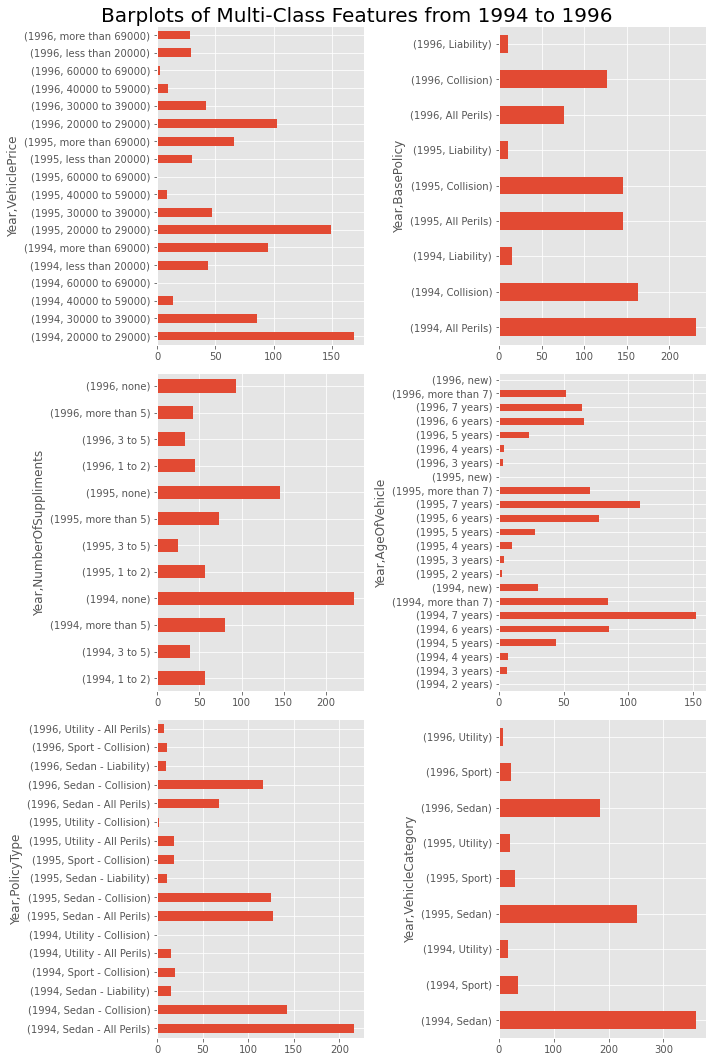

In [47]:
# Create bar plots for some interesting multi-class features across the years 
fig, [[ax0, ax1], [ax2, ax3], [ax4, ax5]] = plt.subplots(nrows = 3, ncols = 2, figsize = (10,15))
fraud.groupby(['Year', 'VehiclePrice'])['Year'].count().plot(kind= 'barh', ax = ax0)
fraud.groupby(['Year', 'BasePolicy'])['Year'].count().plot(kind= 'barh', ax = ax1)
fraud.groupby(['Year', 'NumberOfSuppliments'])['Year'].count().plot(kind= 'barh', ax = ax2)
fraud.groupby(['Year', 'AgeOfVehicle'])['Year'].count().plot(kind= 'barh', ax = ax3)
fraud.groupby(['Year', 'PolicyType'])['Year'].count().plot(kind= 'barh', ax = ax4)
fraud.groupby(['Year', 'VehicleCategory'])['Year'].count().plot(kind= 'barh', ax = ax5)
fig.suptitle ('Barplots of Multi-Class Features from 1994 to 1996', fontsize = 20)
    
plt.tight_layout()

From the countplots above, the other features did not show much unusual changes or trends along the years. Overall as a whole, there was a decreasing trend in all features, which corresponds to the decreasing fraud trend along the years. However, we are not able to make any assumptions on whether the change in features influence the decreasing fraud trend along the years , or vice versa. More context on the policies implemented will be needed to provide better insights. 

#### 2. As most of the vehicles involved in fraud were priced from $20000 - $29000 and mostly Sedan, what were the demographics for this group of policyholders?

In [48]:
# Create a sub-dataset containing only sedan priced at $20000- $29000 
popcat= fraud.loc[(fraud['VehiclePrice'].isin(['20000 to 29000'])& fraud['VehicleCategory'].isin(['Sedan'])), :]

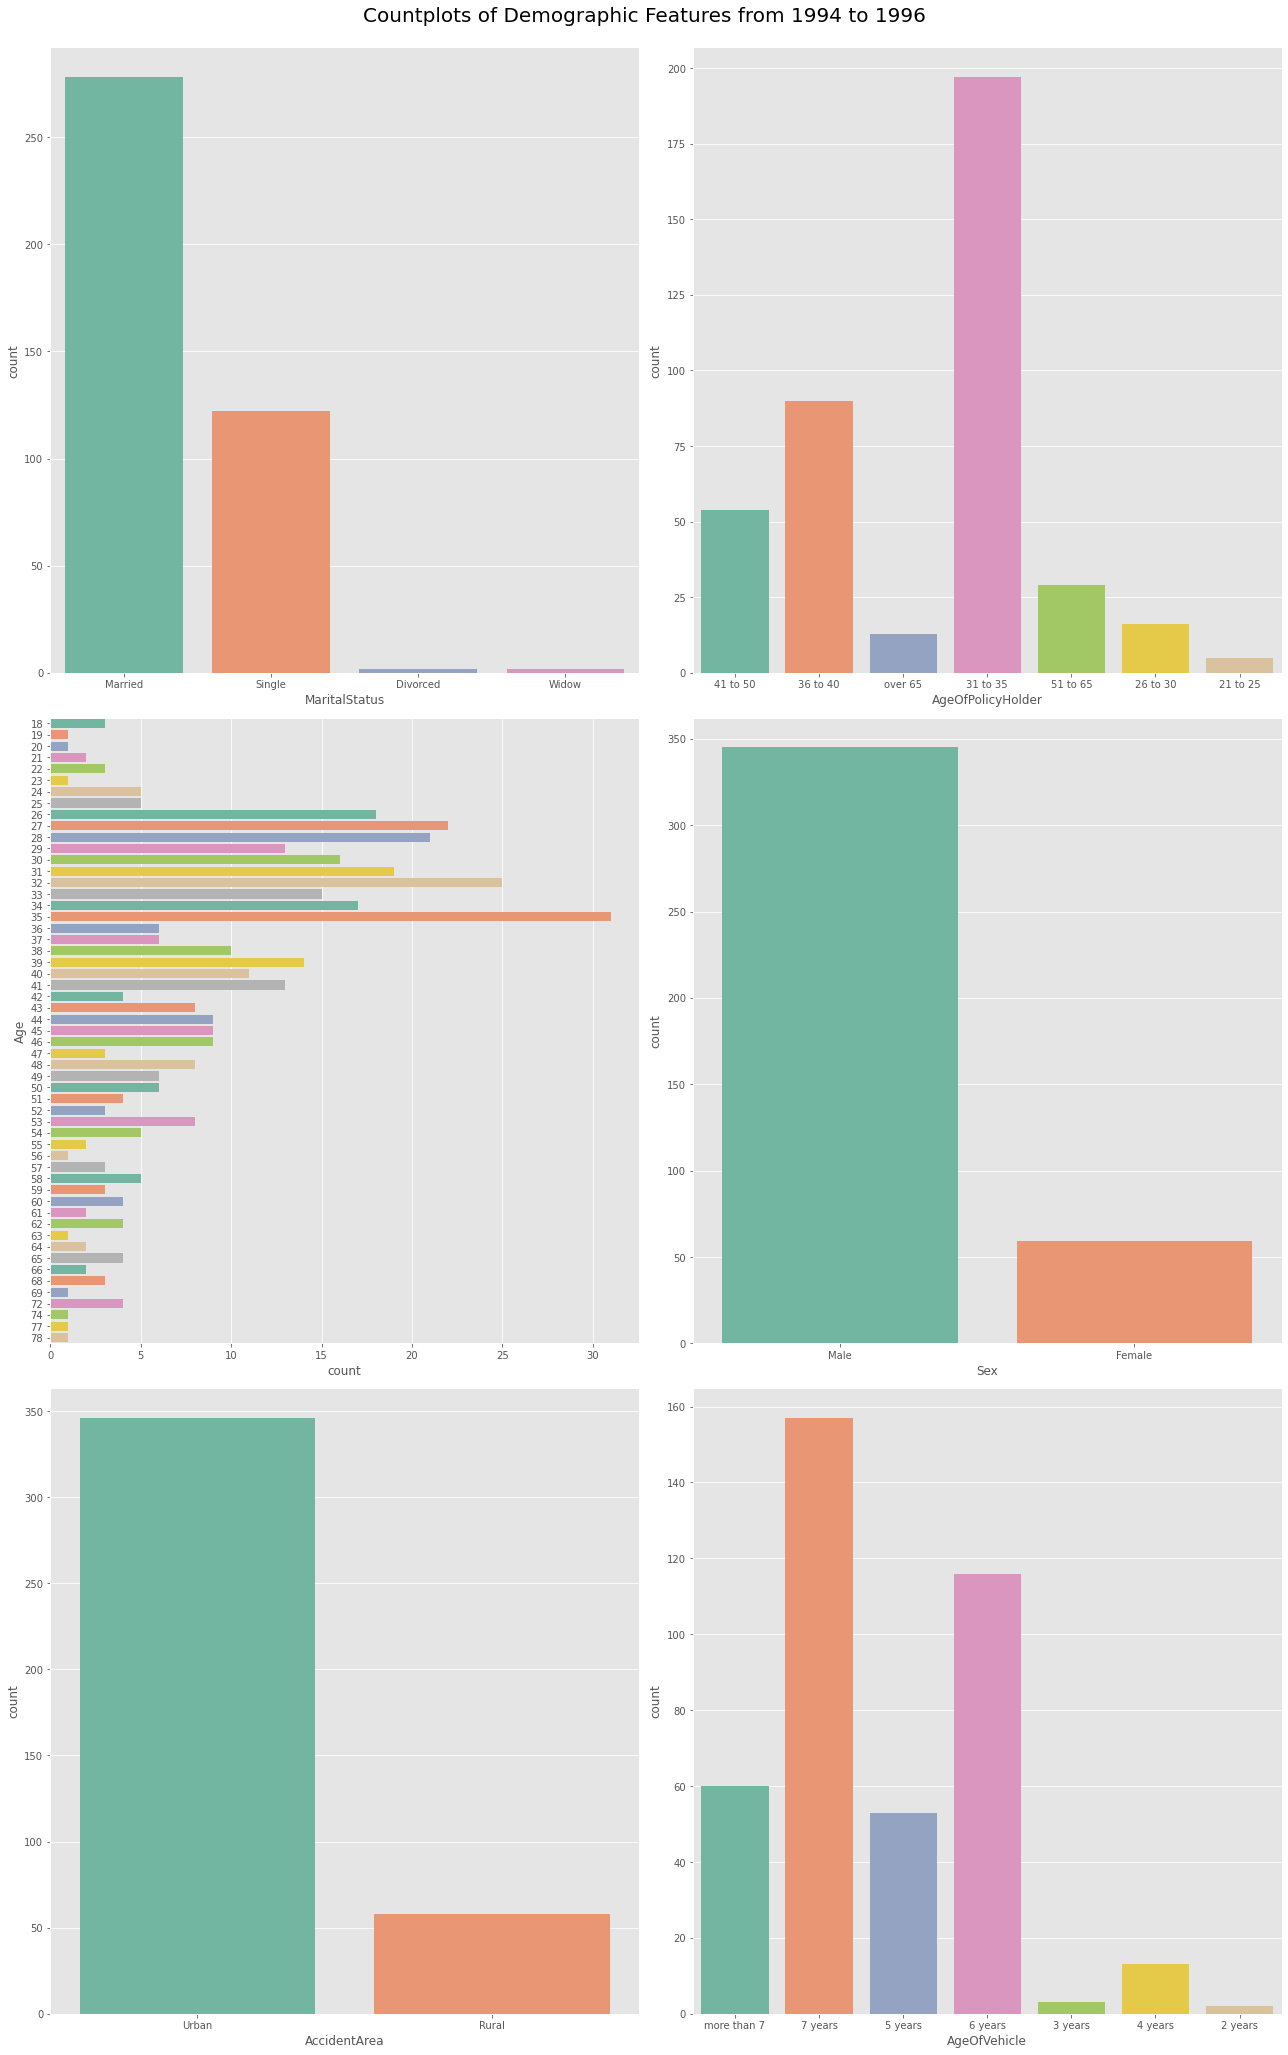

In [108]:
# Create countplots to show how the demographic features vary for the group in dataframe popcat
fig, [[ax0, ax1], [ax2, ax3], [ax4, ax5]] = plt.subplots(nrows = 3, ncols = 2, figsize = (18,30))
sns.countplot(x = 'MaritalStatus', data = popcat, palette= 'Set2', ax=ax0)
sns.countplot(x = 'AgeOfPolicyHolder', data = popcat, palette= 'Set2', ax= ax1)
sns.countplot(y = 'Age', data = popcat, palette= 'Set2', ax= ax2)
sns.countplot(x = 'Sex', data = popcat, palette= 'Set2', ax = ax3)
sns.countplot(x = 'AccidentArea', data = popcat, palette= 'Set2', ax = ax4)
sns.countplot(x = 'AgeOfVehicle', data = popcat, palette= 'Set2', ax = ax5)

fig.suptitle ('Countplots of Demographic Features from 1994 to 1996', fontsize = 20)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])    

The demographics trend seem to mirror the the general trend of the fraud cases. 

#### 3. For the common car models in fraud cases, what were the demographics like? (e.g Age group, Marital Status)

For this part, we will only be exploring the top 3 car models involved in fraud cases - Pontiac, Honda and Toyota.

In [50]:
# Create a sub-dataset which consists only fraud cases involving car models - Pontiac, Honda and Toyata
pop_car= fraud.loc[fraud['Make'].isin(['Pontiac', 'Honda', 'Toyota']), :]

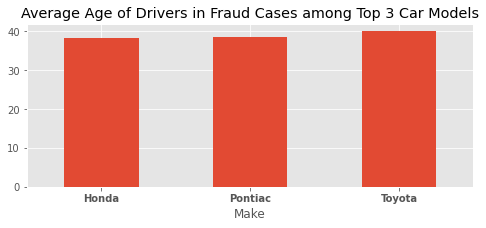

In [51]:
# To find out the average age of the drivers for these 3 models
fig,(ax) = plt.subplots(figsize=(8, 3))
pop_car.groupby(['Make'])['Age'].mean().plot(kind='bar').set(title= 'Average Age of Drivers in Fraud Cases among Top 3 Car Models')
plt.xticks(fontsize=10,fontweight='bold',rotation=0);

The average age of drivers in fraud cases involving the top 3 models is around 38 to 40 years old. 

Let us look at the Age of policy holder, Marital Status, Gender and Age. 

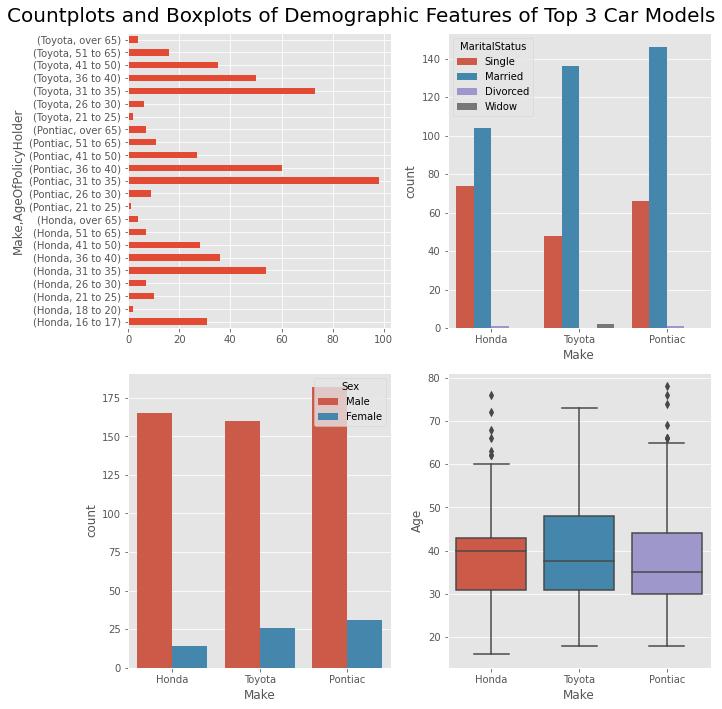

In [52]:
fig,([ax0, ax1], [ax2, ax3]) = plt.subplots(2, 2,figsize=(10, 10))
pop_car.groupby(['Make', 'AgeOfPolicyHolder'])['AgeOfPolicyHolder'].count().plot(kind='barh', ax= ax0)
sns.countplot(x= 'Make', data = pop_car, ax = ax1, hue = 'MaritalStatus')
sns.countplot(x= 'Make', data = pop_car, ax = ax2, hue = 'Sex')
sns.boxplot(x= 'Make', y= 'Age', data= pop_car, ax = ax3)

fig.suptitle ('Countplots and Boxplots of Demographic Features of Top 3 Car Models', fontsize = 20)
    
plt.tight_layout()

Bulk of the policy holders were middle-aged ( 31 to 50 years old) for all 3 car models. However, for Honda, there were more younger policy holders with age range from 16-25 years old. It might be due to the possible age regulations imposed by the car model company or insurance company. 

Honda cars in fraud cases also had a higher number of drivers who were single compared to other models. Married fraudsters usually drive a Pontiac or Toyota car model. 

Interestingly, Honda drivers were actually generally older compared to the other car models. 

Therefore, we can infer that most single drivers might prefer Honda model to be used in a fraud case. Although the age of policy holder for Honda can be much younger(16-25), the average age of the drivers involved in the accident was much older(40). This means that the driver who used the Honda car in a fraud case might not be the policy holder. They might make the claim under another policy holder by misusing the personal details. The lax age regulations by the car model company Honda/insurance company might allow this to happen easily. Hence, it would be good for policy makers and car insurance companies to look into this. 

This insight prompts us to dive deeper to take a look at how the vehicle price and age varies across these 3 models. 

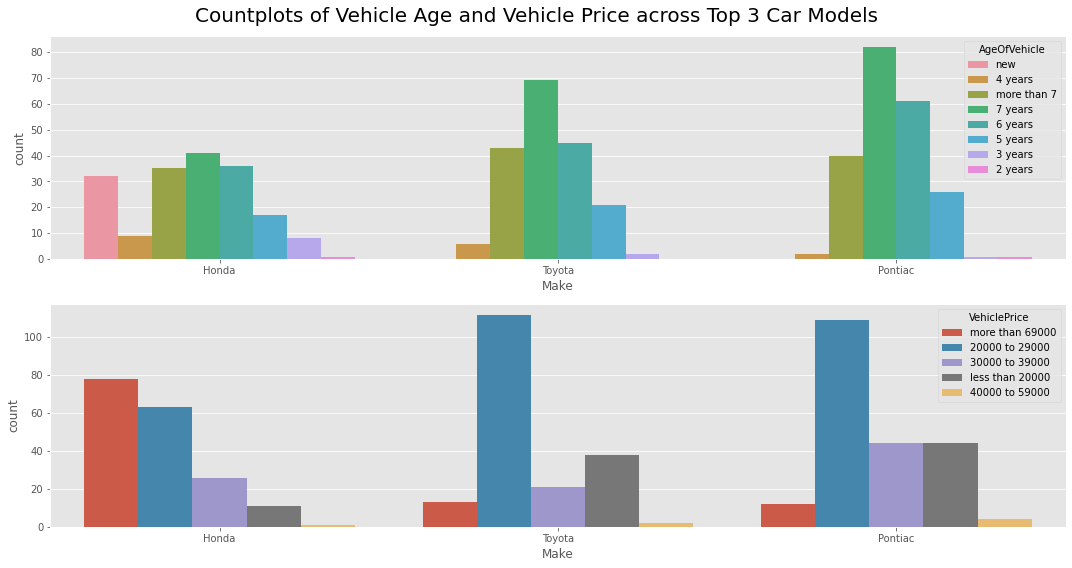

In [53]:
# Create countplots to show how Vehicle Age and Vehicle Price vary across the 3 models 
fig,(ax1, ax2) = plt.subplots(2,1, figsize=(15, 8))
sns.countplot(x='Make', data= pop_car,hue = 'AgeOfVehicle', ax = ax1)
sns.countplot(x='Make', data= pop_car,hue = 'VehiclePrice', ax = ax2)
fig.suptitle ('Countplots of Vehicle Age and Vehicle Price across Top 3 Car Models', fontsize = 20)
    
plt.tight_layout()

Interestingly, only Honda car models have new cars involved in fruad cases and it has the most number of vehicles priced over $69000. Usually, fraudsters would use cars that are old and priced cheaply for such 'accidents'. It is not common for them to use a brand new and expensive car. 
Therefore, it would be useful to look the policies that the insurance company has for Honda vehicles. There could be a possibility that brand new or expensive Honda cars can get higher payout when involved in an accident. 


Let us dive deeper and check if majority of brand new cars priced over $69000 is from Honda. 

In [54]:
fraud.loc[fraud['VehiclePrice'].isin(['more than 69000']) & fraud['AgeOfVehicle'].isin(['new']), 'Make'].value_counts()

Honda    32
Name: Make, dtype: int64

Indeed, all brand new cars priced over $69000 were of Honda model. This indicates that more investigation is needed for Honda cars and its related insurance policies and regulations. Were there loopholes which allow brand new expensive Honda cars involved in an accident to claim a much higher insurance payout? 


**All the findings above should be considered together with the context of how the vehicle insurance policy work, how the insurance company work with the vehicle model company as well as the government/company's efforts to prevent or detect fraud.**

#### 4. Other Interesting Observations involving demographics and the other features 

- The features below are those that show more interesting trends for the fraud cases. The bar plots show the interactions between gender, age and features like Deductible, Policy Type, Vehicle Category and Age of Vehicle.

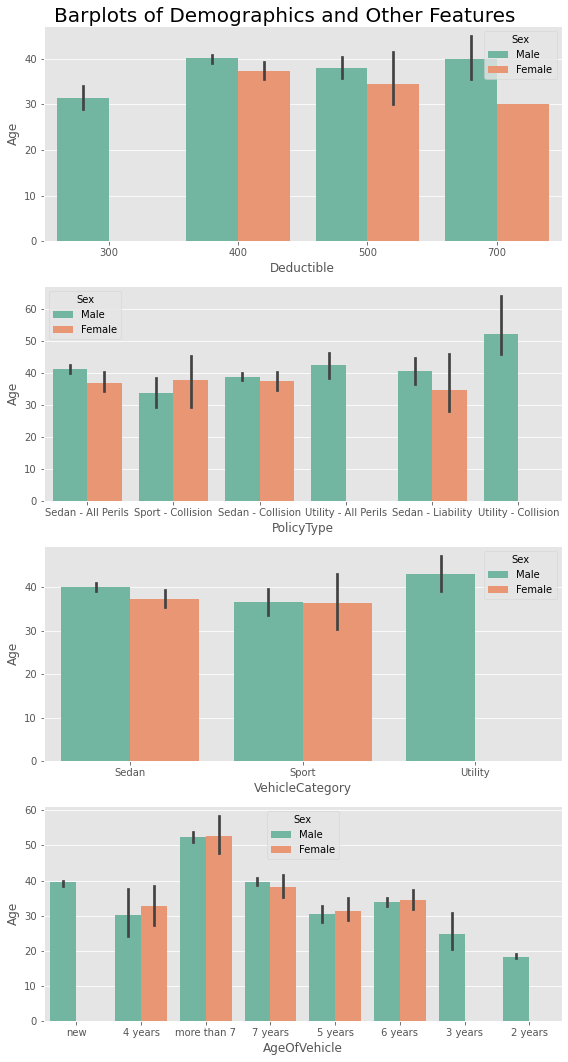

In [55]:
# Create a For Loop to plot barplots to show how gender and age varies across Deductible, Policy Type, Vehicle Category and Vehicle Age
interesting_feat= ['Deductible', 'PolicyType','VehicleCategory', 'AgeOfVehicle' ]
n=len(interesting_feat)
fig,ax = plt.subplots(n ,1, figsize=(8,15))

for i in range(n):
    plt.sca(ax[i])
    col = interesting_feat[i]
    sns.barplot(x=col, y= 'Age', data= fraud, hue= 'Sex',palette = 'Set2')
    
    fig.suptitle ('Barplots of Demographics and Other Features', fontsize = 20)
    
    plt.tight_layout()

The mean age of the person involved in accident was lower when deductible was the lowest at $300. This might be due to a lower deductible with a younger age. Fraudulent claims for policy with higher deductible might be higher due to the higher payouts available and this group of fraudsters tend to be of an older age. 

In addition, it is interesting to observe that fraudsters who drove utility cars were much older. Older drivers also drove an older vehicle. They tend to make a fraudulent claim under Policy type Utility -Collision. 


# 5. Data Pre-Processing and Feature Engineering 


(a) Encoding for categorical columns

    Binning for the following features:
        1. Make
        2. Marital Status
        3. Days_Policy_Accident
        4. Days_Policy_Claim
        5. AddressChange_Claim
        6. NumberOfCars
        
    As a guide for encoding in this project, only features with max 3 categories will be considered for dummy encoding.

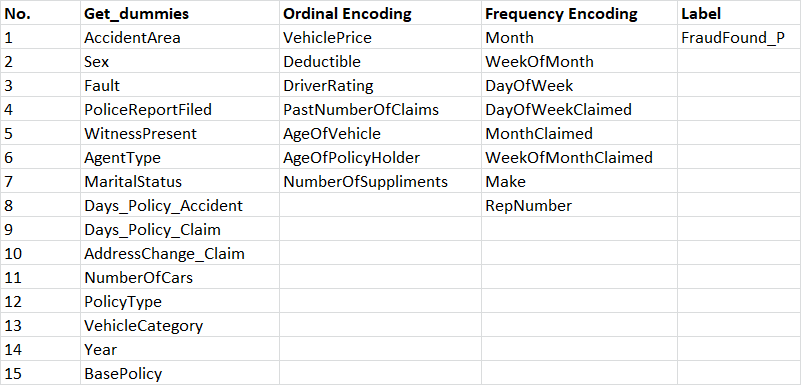
   
        
 
(b) Log transformation for column 'Age'

### Clean up column 'PolicyType' 

- As Policy Type and Base Policy consist of repetitive information, we will remove the policy information under Policy Type

In [56]:
df['PolicyType'].value_counts()

Sedan - Collision       5584
Sedan - Liability       4987
Sedan - All Perils      4086
Sport - Collision        348
Utility - All Perils     340
Utility - Collision       30
Sport - All Perils        22
Utility - Liability       21
Sport - Liability          1
Name: PolicyType, dtype: int64

In [57]:
# Create a function to remove the policy information 
def ptconvert(data):
    data = data.split()
    for i in data:
        pt = data[0]
        return pt

In [58]:
df['PolicyType'] = df['PolicyType'].astype(str).apply(ptconvert)

In [59]:
df['PolicyType'].unique()

array(['Sport', 'Sedan', 'Utility'], dtype=object)

### Binning for selected features

  1. Make
  2. Marital Status
  3. Days_Policy_Accident
  4. Days_Policy_Claim
  5. AddressChange_Claim
  6. NumberOfCars

These features were selected for binning during the EDA done in the previous section.

**1. Make**

In [60]:
group = ['Honda', 'Toyota', 'Chevrolet', 'Accura', 'Mazda', 'Pontiac','Ford']
# Sieve out car models not in the top 7 
df.loc[~df['Make'].isin(group), 'Make'].unique()

array(['Dodge', 'Mercury', 'Jaguar', 'Nisson', 'VW', 'Saab', 'Saturn',
       'Porche', 'BMW', 'Mecedes', 'Ferrari', 'Lexus'], dtype=object)

In [61]:
# Bin these car models under 'Others'
df.loc[~df['Make'].isin(group), 'Make'] = 'Others'

In [62]:
df['Make'].unique()

array(['Honda', 'Toyota', 'Ford', 'Mazda', 'Chevrolet', 'Pontiac',
       'Accura', 'Others'], dtype=object)

**2. MaritalStatus**

In [63]:
df['MaritalStatus'].unique()

array(['Single', 'Married', 'Widow', 'Divorced'], dtype=object)

In [64]:
# Bin "Widow" and "Divorced" as 'Others'
df.loc[df['MaritalStatus'].isin(['Widow', 'Divorced']), 'MaritalStatus'] = 'Others'

In [65]:
df['MaritalStatus'].unique()

array(['Single', 'Married', 'Others'], dtype=object)

**3. Days_Policy_Accident**

In [66]:
df['Days_Policy_Accident'].unique()

array(['more than 30', '15 to 30', 'none', '1 to 7', '8 to 15'],
      dtype=object)

In [67]:
# Bin the Days_Policy_Accident - '15 to 30', 'none', '1 to 7', '8 to 15' as 'Others'
df.loc[df['Days_Policy_Accident'].isin(['15 to 30', 'none', '1 to 7', '8 to 15']), 'Days_Policy_Accident'] = 'Others'

In [68]:
df['Days_Policy_Accident'].unique()

array(['more than 30', 'Others'], dtype=object)

**4. Days_Policy_Claim**

In [69]:
df['Days_Policy_Claim'].unique()

array(['more than 30', '15 to 30', '8 to 15'], dtype=object)

In [70]:
# Bin the Days_Policy_Claim - '15 to 30', '8 to 15' as 'Others'
df.loc[df['Days_Policy_Claim'].isin(['15 to 30',  '8 to 15']), 'Days_Policy_Claim'] = 'Others'

In [71]:
df['Days_Policy_Claim'].unique()

array(['more than 30', 'Others'], dtype=object)

**5. AddressChange_Claim**

In [72]:
df['AddressChange_Claim'].unique()

array(['1 year', 'no change', '4 to 8 years', '2 to 3 years',
       'under 6 months'], dtype=object)

In [73]:
# Bin AddressChange_Claim - 'no change' as 'Others'
df.loc[~df['AddressChange_Claim'].isin(['no change']), 'AddressChange_Claim'] = 'Others'

In [74]:
df['AddressChange_Claim'].unique()

array(['Others', 'no change'], dtype=object)

**6. NumberOfCars**

In [75]:
df['NumberOfCars'].unique()

array(['3 to 4', '1 vehicle', '2 vehicles', '5 to 8', 'more than 8'],
      dtype=object)

In [76]:
# Bin NumberOfCars - more than 1 vehicle as 'Others'
df.loc[~df['NumberOfCars'].isin(['1 vehicle']), 'NumberOfCars'] = 'Others'

In [77]:
df['NumberOfCars'].unique()

array(['Others', '1 vehicle'], dtype=object)

### Ensure data types are correct before encoding 

- Convert all categorical features into string datatype to faciltate encoding.

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15419 entries, 0 to 15418
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15419 non-null  object
 1   WeekOfMonth           15419 non-null  int64 
 2   DayOfWeek             15419 non-null  object
 3   Make                  15419 non-null  object
 4   AccidentArea          15419 non-null  object
 5   DayOfWeekClaimed      15419 non-null  object
 6   MonthClaimed          15419 non-null  object
 7   WeekOfMonthClaimed    15419 non-null  int64 
 8   Sex                   15419 non-null  object
 9   MaritalStatus         15419 non-null  object
 10  Age                   15419 non-null  int64 
 11  Fault                 15419 non-null  object
 12  PolicyType            15419 non-null  object
 13  VehicleCategory       15419 non-null  object
 14  VehiclePrice          15419 non-null  object
 15  FraudFound_P          15419 non-null

In [79]:
to_str = ['WeekOfMonth', 'WeekOfMonthClaimed','RepNumber', 'Deductible', 'DriverRating', 'Year']

In [80]:
# For Loop to convert the date type to string 
for i in to_str:
    df[i]= df[i].astype('str')

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15419 entries, 0 to 15418
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15419 non-null  object
 1   WeekOfMonth           15419 non-null  object
 2   DayOfWeek             15419 non-null  object
 3   Make                  15419 non-null  object
 4   AccidentArea          15419 non-null  object
 5   DayOfWeekClaimed      15419 non-null  object
 6   MonthClaimed          15419 non-null  object
 7   WeekOfMonthClaimed    15419 non-null  object
 8   Sex                   15419 non-null  object
 9   MaritalStatus         15419 non-null  object
 10  Age                   15419 non-null  int64 
 11  Fault                 15419 non-null  object
 12  PolicyType            15419 non-null  object
 13  VehicleCategory       15419 non-null  object
 14  VehiclePrice          15419 non-null  object
 15  FraudFound_P          15419 non-null

### Get_dummies Encoding 

In [82]:
dummies= ['AccidentArea', 'Sex', 'Fault', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'MaritalStatus', 
          'Days_Policy_Accident', 'Days_Policy_Claim', 'AddressChange_Claim', 'NumberOfCars','PolicyType', 'VehicleCategory', 'Year','BasePolicy']

In [83]:
dum = pd.get_dummies(df[dummies], drop_first=True, dtype= 'int64')
dum

,AccidentArea_Urban,Sex_Male,Fault_Third Party,PoliceReportFiled_Yes,WitnessPresent_Yes,AgentType_Internal,MaritalStatus_Others,MaritalStatus_Single,Days_Policy_Accident_more than 30,Days_Policy_Claim_more than 30,AddressChange_Claim_no change,NumberOfCars_Others,PolicyType_Sport,PolicyType_Utility,VehicleCategory_Sport,VehicleCategory_Utility,Year_1995,Year_1996,BasePolicy_Collision,BasePolicy_Liability
0,1,0,0,0,0,0,0,1,1,1,0,1,1,0,1,0,0,0,0,1
1,1,1,0,1,0,0,0,1,1,1,1,0,1,0,1,0,0,0,1,0
2,1,1,0,0,0,0,0,0,1,1,1,0,1,0,1,0,0,0,1,0
3,0,1,1,1,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1
4,1,0,1,0,0,0,0,1,1,1,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15414,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,0
15415,1,1,0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,1,0,1
15416,0,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,1,0
15417,1,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0


In [84]:
df1= pd.concat([df, dum], axis = 1)

In [85]:
df1.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AddressChange_Claim_no change,NumberOfCars_Others,PolicyType_Sport,PolicyType_Utility,VehicleCategory_Sport,VehicleCategory_Utility,Year_1995,Year_1996,BasePolicy_Collision,BasePolicy_Liability
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,0,1,1,0,1,0,0,0,0,1
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,1,0,1,0,1,0,0,0,1,0
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,1,0,1,0,1,0,0,0,1,0
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,1,0,0,0,1,0,0,0,0,1
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,1,0,1,0,1,0,0,0,1,0


In [86]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15419 entries, 0 to 15418
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Month                              15419 non-null  object
 1   WeekOfMonth                        15419 non-null  object
 2   DayOfWeek                          15419 non-null  object
 3   Make                               15419 non-null  object
 4   AccidentArea                       15419 non-null  object
 5   DayOfWeekClaimed                   15419 non-null  object
 6   MonthClaimed                       15419 non-null  object
 7   WeekOfMonthClaimed                 15419 non-null  object
 8   Sex                                15419 non-null  object
 9   MaritalStatus                      15419 non-null  object
 10  Age                                15419 non-null  int64 
 11  Fault                              15419 non-null  object
 12  Poli

In [87]:
df1

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AddressChange_Claim_no change,NumberOfCars_Others,PolicyType_Sport,PolicyType_Utility,VehicleCategory_Sport,VehicleCategory_Utility,Year_1995,Year_1996,BasePolicy_Collision,BasePolicy_Liability
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,0,1,1,0,1,0,0,0,0,1
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,1,0,1,0,1,0,0,0,1,0
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,1,0,1,0,1,0,0,0,1,0
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,1,0,0,0,1,0,0,0,0,1
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15414,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,1,0,0,0,0,0,0,1,1,0
15415,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,1,1,0,0,1,0,0,1,0,1
15416,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,1,0,0,0,0,0,0,1,1,0
15417,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,1,0,0,0,0,0,0,1,0,0


In [88]:
df1.drop(dummies,axis = 1, inplace = True)

In [89]:
df1

,Month,WeekOfMonth,DayOfWeek,Make,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Age,VehiclePrice,FraudFound_P,...,AddressChange_Claim_no change,NumberOfCars_Others,PolicyType_Sport,PolicyType_Utility,VehicleCategory_Sport,VehicleCategory_Utility,Year_1995,Year_1996,BasePolicy_Collision,BasePolicy_Liability
0,Dec,5,Wednesday,Honda,Tuesday,Jan,1,21,more than 69000,0,...,0,1,1,0,1,0,0,0,0,1
1,Jan,3,Wednesday,Honda,Monday,Jan,4,34,more than 69000,0,...,1,0,1,0,1,0,0,0,1,0
2,Oct,5,Friday,Honda,Thursday,Nov,2,47,more than 69000,0,...,1,0,1,0,1,0,0,0,1,0
3,Jun,2,Saturday,Toyota,Friday,Jul,1,65,20000 to 29000,0,...,1,0,0,0,1,0,0,0,0,1
4,Jan,5,Monday,Honda,Tuesday,Feb,2,27,more than 69000,0,...,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15414,Nov,4,Friday,Toyota,Tuesday,Nov,5,35,20000 to 29000,1,...,1,0,0,0,0,0,0,1,1,0
15415,Nov,5,Thursday,Pontiac,Friday,Dec,1,30,30000 to 39000,0,...,1,1,0,0,1,0,0,1,0,1
15416,Nov,5,Thursday,Toyota,Friday,Dec,1,24,20000 to 29000,1,...,1,0,0,0,0,0,0,1,1,0
15417,Dec,1,Monday,Toyota,Thursday,Dec,2,34,20000 to 29000,0,...,1,0,0,0,0,0,0,1,0,0


### Ordinal Encoding 

In [90]:
# Create lists for order of categories in the columns:
vehicleprice = ['less than 20000', '20000 to 29000', '30000 to 39000', '40000 to 59000', '60000 to 69000', 'more than 69000']
deductible = ['300', '400', '500', '700']
driverrating = ['1', '2', '3', '4']
pastclaims= ['none', '1', '2 to 4', 'more than 4']
ageofvehicle = ['new', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', 'more than 7']
agepolhol = ['16 to 17', '18 to 20', '21 to 25', '26 to 30','31 to 35', '36 to 40', '41 to 50', '51 to 65', 'over 65']
numofsup = ['none', '1 to 2', '3 to 5', 'more than 5']

# List containing columns to encode 
ord_list= ['VehiclePrice', 'Deductible', 'DriverRating', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'NumberOfSuppliments']

In [91]:
# Feed in the order of categories in the respective columns
encoder = OrdinalEncoder(categories= [vehicleprice, deductible, driverrating, pastclaims, ageofvehicle, agepolhol, numofsup], dtype = 'int64')

In [92]:
# Create a function to ordinal encode the columns in ord_list 
def ordenc(ordlist, df):
    encoded = encoder.fit_transform( df[ordlist])
    ord_encoded = pd.DataFrame(encoded, columns = ordlist)
    df.drop(ord_list, axis = 1, inplace = True) #Drop original columns
    df= pd.concat([df, ord_encoded], axis = 1) #concat the results to the original dataframe 
   
    return (df)

In [93]:
df1 = ordenc(ord_list, df1)
df1

,Month,WeekOfMonth,DayOfWeek,Make,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Age,FraudFound_P,RepNumber,...,Year_1996,BasePolicy_Collision,BasePolicy_Liability,VehiclePrice,Deductible,DriverRating,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,NumberOfSuppliments
0,Dec,5,Wednesday,Honda,Tuesday,Jan,1,21,0,12,...,0,0,1,5,0,0,0,2,3,0
1,Jan,3,Wednesday,Honda,Monday,Jan,4,34,0,15,...,0,1,0,5,1,3,0,5,4,0
2,Oct,5,Friday,Honda,Thursday,Nov,2,47,0,7,...,0,1,0,5,1,2,1,6,6,0
3,Jun,2,Saturday,Toyota,Friday,Jul,1,65,0,4,...,0,0,1,1,1,1,1,7,7,3
4,Jan,5,Monday,Honda,Tuesday,Feb,2,27,0,3,...,0,1,0,5,1,0,0,4,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15414,Nov,4,Friday,Toyota,Tuesday,Nov,5,35,1,5,...,1,1,0,1,1,3,2,5,4,0
15415,Nov,5,Thursday,Pontiac,Friday,Dec,1,30,0,11,...,1,0,1,2,1,2,3,5,4,3
15416,Nov,5,Thursday,Toyota,Friday,Dec,1,24,1,4,...,1,1,0,1,1,3,3,4,3,1
15417,Dec,1,Monday,Toyota,Thursday,Dec,2,34,0,6,...,1,0,0,1,1,3,0,1,4,3


In [94]:
encoder.categories

[['less than 20000',
  '20000 to 29000',
  '30000 to 39000',
  '40000 to 59000',
  '60000 to 69000',
  'more than 69000'],
 ['300', '400', '500', '700'],
 ['1', '2', '3', '4'],
 ['none', '1', '2 to 4', 'more than 4'],
 ['new',
  '2 years',
  '3 years',
  '4 years',
  '5 years',
  '6 years',
  '7 years',
  'more than 7'],
 ['16 to 17',
  '18 to 20',
  '21 to 25',
  '26 to 30',
  '31 to 35',
  '36 to 40',
  '41 to 50',
  '51 to 65',
  'over 65'],
 ['none', '1 to 2', '3 to 5', 'more than 5']]

In [95]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15419 entries, 0 to 15418
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Month                              15419 non-null  object
 1   WeekOfMonth                        15419 non-null  object
 2   DayOfWeek                          15419 non-null  object
 3   Make                               15419 non-null  object
 4   DayOfWeekClaimed                   15419 non-null  object
 5   MonthClaimed                       15419 non-null  object
 6   WeekOfMonthClaimed                 15419 non-null  object
 7   Age                                15419 non-null  int64 
 8   FraudFound_P                       15419 non-null  int64 
 9   RepNumber                          15419 non-null  object
 10  AccidentArea_Urban                 15419 non-null  int64 
 11  Sex_Male                           15419 non-null  int64 
 12  Faul

### Frequency Encoding 

In [96]:
# Create a list containing the columns to do frequency encoding 
freqlist = ['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'RepNumber']

In [97]:
#Create a function to calculate frequency for each category in the columns under freqlist and do frequency encoding for each column  
df_fe = pd.DataFrame()
def freqenc (freqlist, df):
    for i in freqlist:
        counts = df[i].value_counts()
    # get frequency of each category
        encoding = counts/len(df)
    # map() maps the frequency of each category to each observation
        df_fe[i] = df[i].map(encoding)
    df.drop(freqlist, axis = 1, inplace = True)  # Drop original columns 
    # Concat the results to the original dataframe 
    df= pd.concat([df, df_fe], axis = 1)
    
    return(df)

In [98]:
df1 = freqenc(freqlist, df1)

In [99]:
df1

,Age,FraudFound_P,AccidentArea_Urban,Sex_Male,Fault_Third Party,PoliceReportFiled_Yes,WitnessPresent_Yes,AgentType_Internal,MaritalStatus_Others,MaritalStatus_Single,...,AgeOfPolicyHolder,NumberOfSuppliments,Month,WeekOfMonth,DayOfWeek,Make,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,RepNumber
0,21,0,1,0,0,0,0,0,0,1,...,3,0,0.083339,0.106168,0.140022,0.181594,0.218886,0.093780,0.223685,0.063363
1,34,0,1,1,0,1,0,0,0,1,...,4,0,0.091510,0.236072,0.140022,0.181594,0.243660,0.093780,0.222647,0.063299
2,47,0,1,1,0,0,0,0,0,0,...,6,0,0.084636,0.106168,0.158571,0.181594,0.172514,0.083339,0.241261,0.069330
3,65,0,0,1,1,1,0,0,0,0,...,7,3,0.085674,0.230689,0.128543,0.202413,0.161943,0.079447,0.223685,0.059148
4,27,0,1,0,1,0,0,0,0,1,...,4,0,0.091510,0.106168,0.169596,0.181594,0.218886,0.083468,0.241261,0.061547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15414,35,1,1,1,0,0,0,0,0,0,...,4,0,0.077891,0.220377,0.158571,0.202413,0.218886,0.083339,0.080031,0.064012
15415,30,0,1,1,0,0,0,0,0,0,...,4,3,0.077891,0.106168,0.140930,0.248849,0.161943,0.074324,0.223685,0.061483
15416,24,1,0,1,0,0,0,0,0,1,...,3,1,0.077891,0.106168,0.140930,0.202413,0.161943,0.074324,0.223685,0.059148
15417,34,0,1,0,1,0,0,0,0,0,...,4,3,0.083339,0.206693,0.169596,0.202413,0.172514,0.074324,0.241261,0.061093


### Log Transformation for Age

In [100]:
# Log transform Age as it is slightly right-skewed 
df1['Age_log'] = np.log((1+ df1['Age']))

In [101]:
df1

,Age,FraudFound_P,AccidentArea_Urban,Sex_Male,Fault_Third Party,PoliceReportFiled_Yes,WitnessPresent_Yes,AgentType_Internal,MaritalStatus_Others,MaritalStatus_Single,...,NumberOfSuppliments,Month,WeekOfMonth,DayOfWeek,Make,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,RepNumber,Age_log
0,21,0,1,0,0,0,0,0,0,1,...,0,0.083339,0.106168,0.140022,0.181594,0.218886,0.093780,0.223685,0.063363,3.091042
1,34,0,1,1,0,1,0,0,0,1,...,0,0.091510,0.236072,0.140022,0.181594,0.243660,0.093780,0.222647,0.063299,3.555348
2,47,0,1,1,0,0,0,0,0,0,...,0,0.084636,0.106168,0.158571,0.181594,0.172514,0.083339,0.241261,0.069330,3.871201
3,65,0,0,1,1,1,0,0,0,0,...,3,0.085674,0.230689,0.128543,0.202413,0.161943,0.079447,0.223685,0.059148,4.189655
4,27,0,1,0,1,0,0,0,0,1,...,0,0.091510,0.106168,0.169596,0.181594,0.218886,0.083468,0.241261,0.061547,3.332205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15414,35,1,1,1,0,0,0,0,0,0,...,0,0.077891,0.220377,0.158571,0.202413,0.218886,0.083339,0.080031,0.064012,3.583519
15415,30,0,1,1,0,0,0,0,0,0,...,3,0.077891,0.106168,0.140930,0.248849,0.161943,0.074324,0.223685,0.061483,3.433987
15416,24,1,0,1,0,0,0,0,0,1,...,1,0.077891,0.106168,0.140930,0.202413,0.161943,0.074324,0.223685,0.059148,3.218876
15417,34,0,1,0,1,0,0,0,0,0,...,3,0.083339,0.206693,0.169596,0.202413,0.172514,0.074324,0.241261,0.061093,3.555348


Text(3.7, 1000, 'Average = 3.69')

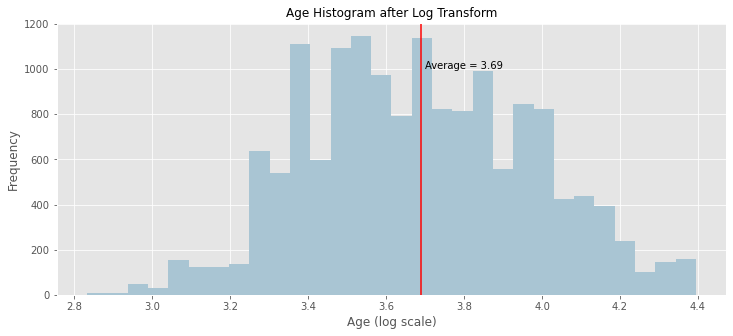

In [102]:
# Create the histogram for Age to observe the distribution
# Calculate the mean of Age_log for annotation in the histogram 
age_log_mean = np.round(np.mean(df1['Age_log']), 2)

fig, ax = plt.subplots(figsize = (12,5))
df1['Age_log'].hist(bins=30, color='#A9C5D3')
ax.axvline(age_log_mean, color='r', label = 'age_log_mean')
ax.set_title('Age Histogram after Log Transform', fontsize=12)
ax.set_xlabel('Age (log scale)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(3.7, 1000, f'Average = {age_log_mean}', fontsize=10)

In [103]:
df1.drop('Age', axis = 1, inplace = True)

In [104]:
df1.head()

,FraudFound_P,AccidentArea_Urban,Sex_Male,Fault_Third Party,PoliceReportFiled_Yes,WitnessPresent_Yes,AgentType_Internal,MaritalStatus_Others,MaritalStatus_Single,Days_Policy_Accident_more than 30,...,NumberOfSuppliments,Month,WeekOfMonth,DayOfWeek,Make,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,RepNumber,Age_log
0,0,1,0,0,0,0,0,0,1,1,...,0,0.083339,0.106168,0.140022,0.181594,0.218886,0.093780,0.223685,0.063363,3.091042
1,0,1,1,0,1,0,0,0,1,1,...,0,0.091510,0.236072,0.140022,0.181594,0.243660,0.093780,0.222647,0.063299,3.555348
2,0,1,1,0,0,0,0,0,0,1,...,0,0.084636,0.106168,0.158571,0.181594,0.172514,0.083339,0.241261,0.069330,3.871201
3,0,0,1,1,1,0,0,0,0,1,...,3,0.085674,0.230689,0.128543,0.202413,0.161943,0.079447,0.223685,0.059148,4.189655
4,0,1,0,1,0,0,0,0,1,1,...,0,0.091510,0.106168,0.169596,0.181594,0.218886,0.083468,0.241261,0.061547,3.332205


In [105]:
# Do a final check to see if all the features are in integer or float datatypes, ready for machine learning
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15419 entries, 0 to 15418
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FraudFound_P                       15419 non-null  int64  
 1   AccidentArea_Urban                 15419 non-null  int64  
 2   Sex_Male                           15419 non-null  int64  
 3   Fault_Third Party                  15419 non-null  int64  
 4   PoliceReportFiled_Yes              15419 non-null  int64  
 5   WitnessPresent_Yes                 15419 non-null  int64  
 6   AgentType_Internal                 15419 non-null  int64  
 7   MaritalStatus_Others               15419 non-null  int64  
 8   MaritalStatus_Single               15419 non-null  int64  
 9   Days_Policy_Accident_more than 30  15419 non-null  int64  
 10  Days_Policy_Claim_more than 30     15419 non-null  int64  
 11  AddressChange_Claim_no change      15419 non-null  int

Dataset is pre-processed and now ready for machine learning. 
The dataset is export out as a csv for usage in machine learning.

In [106]:
df1.to_csv('machinelearn.csv')